# **Data Cleaning**

## **Import Package**

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import additional files with statistical functions
import sys
import os

### **Data**

In [81]:
data = pd.read_excel('DATA AR JANUARI - MEI 2023 - FIX - Copy.xlsx')
data.head()

,Nomor,AR_Type,Cust_Name,Segment,Bidang Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Address_Terminating,SBU_Ter,AL_Status,Kabupaten/Kota,Wilayah
0,1,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,"(Kantor Kecamatan Singgahan) Jojogan, Mulyoagu...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
1,2,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Plumpang) Jl. Raya Plumpang ...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
2,3,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Parengan) Jl. Cokrokusumo No...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
3,4,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,(Kantor Kecamatan Kerek) Jalan Raya Kresek No....,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban
4,5,Change Tariff,DINAS KOMUNIKASI DAN INFORMATIKA STATISTIK DAN...,Government,NaN,NaN,Bronze,Units,190000.0,"(Kantor Kecamatan Kenduruan) Jl. Blora No. 01,...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Tuban


## **Feature Engineering**

In [82]:
#drop rows that contain specific 'value' in 'column_name'
data2 = data[(data.Bandwidth != "Units") & (data.Layanan != "Penambahan IPv4 Publik Internet Corporate")]
data3 = data2[data2.AL_Status == "Active"]
data4 = data3[data3.SBU_Ter == "SBU REG JAWA BAGIAN TIMUR"]
data5 = data4[data4.AR_Type != "Trial"]
data5.head()

,Nomor,AR_Type,Cust_Name,Segment,Bidang Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Address_Terminating,SBU_Ter,AL_Status,Kabupaten/Kota,Wilayah
216,738,Upgrade,DESA MACAN PUTIH,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,552252.25,Dusun Macan Putih Utara RT 001 RW 003 Macan Pu...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Banyuwangi
217,738,New,DINAS PEMBERDAYAAN MASYARAKAT DAN DESA KABUPAT...,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,0.00,"Kantor DPMD Kab. Banyuwangi Jl. AdiSucipto, Tu...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Banyuwangi
218,738,New,SMP NEGERI 1 NGLEGOK BLITAR,Education,Pendidikan,Internet,Internet Broadband Corporate,100,1800000.00,"Jl. SMP Desa Dayu,Nglegok ,Kabupaten Blitar ,J...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Blitar
219,738,New,DESA TEBALO KECAMATAN MANYAR KAB. GRESIK,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,20,520000.00,Kantor Balai Desa Tebalo Jalan Raya Masjid Jam...,SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Gresik
236,738,Change Tariff,BENDAHARA PENGELUARAN DINAS KOMUNIKASI DAN INF...,Government,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,2522522.52,"Kantor Kecamatan Ujungpangkah, Jl. Sitarda, Pa...",SBU REG JAWA BAGIAN TIMUR,Active,Kabupaten,Gresik


In [83]:
data6 = data5.drop(['Nomor', 'Segment','Cust_Name', 'Address_Terminating', 'SBU_Ter', 'AL_Status'], axis=1)
data6.head()

,AR_Type,Bidang Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Kabupaten/Kota,Wilayah
216,Upgrade,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,552252.25,Kabupaten,Banyuwangi
217,New,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,0.00,Kabupaten,Banyuwangi
218,New,Pendidikan,Internet,Internet Broadband Corporate,100,1800000.00,Kabupaten,Blitar
219,New,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,20,520000.00,Kabupaten,Gresik
236,Change Tariff,"Administrasi Pemerintahan, Pertahanan Dan Jami...",Internet,Internet Broadband Corporate,50,2522522.52,Kabupaten,Gresik


In [84]:
data6['AR_Type'].value_counts()

New              435
Upgrade          115
Change Tariff     48
Downgrade         30
Relocation        13
Name: AR_Type, dtype: int64

In [85]:
#data7['AR_Type'].value_counts()

In [86]:
data6['Bidang Baku'].value_counts()

Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib                 530
Pendidikan                                                                      34
Industri Pengolahan                                                             27
Informasi dan Komunikasi                                                        16
Aktivitas Kesehatan Manusia Dan Aktivitas Sosial                                 8
Pengadaan Listrik, Gas, Uap/Air Panas Dan Udara Dingin                           7
Perdagangan Besar Dan Eceran; Reparasi Dan Perawatan Mobil Dan Sepeda Motor      3
Aktivitas Keuangan dan Asuransi                                                  3
Kesenian, Hiburan, dan Rekreasi                                                  3
Pertanian, Kehutanan dan Perikanan                                               3
Real Estat                                                                       3
Aktivitas Profesional, Ilmiah Dan Teknis                                         2
Peng

In [87]:
#data7['Bidang Baku'].value_counts()

In [88]:
data['Tipe'].value_counts()

Internet    526
Network     116
Name: Tipe, dtype: int64

In [89]:
#data7['Tipe'].value_counts()

In [90]:
data5['Kabupaten/Kota'].value_counts()

Kota         397
Kabupaten    244
Name: Kabupaten/Kota, dtype: int64

In [91]:
#data7['Kabupaten/Kota'].value_counts()

In [92]:
data6['Layanan'].value_counts()

Internet Broadband Corporate    367
Internet Corporate              150
Metronet                         98
IP VPN                           18
IP Transit                        6
IP Transit IIX                    2
Name: Layanan, dtype: int64

In [93]:
data6['Bandwidth'].value_counts()

20.000      299
10.000       85
50.000       77
15.000       76
100.000      36
40.000       11
30.000        8
5.000         7
1.000         7
80.000        5
200.000       4
25.000        3
60.000        3
70.000        3
150.000       2
2.000         2
1200.000      2
28.000        1
400.000       1
0.512         1
700.000       1
55.000        1
27.000        1
170.000       1
75.000        1
1000.000      1
35.000        1
3.000         1
Name: Bandwidth, dtype: int64

In [94]:
data6['Wilayah'].value_counts()

Mojokerto      285
Malang         119
Bondowoso       56
Gresik          40
Tuban           32
Surabaya        22
Trenggalek      12
Kediri          11
Blitar           8
Jember           7
Tulungagung      6
Pasuruan         6
Sidoarjo         6
Ponorogo         5
Madiun           4
Lamongan         3
Banyuwangi       3
Sumenep          3
Pacitan          3
Bojonegoro       2
Batu             2
Jombang          2
Nganjuk          1
Probolinggo      1
Situbondo        1
Pamekasan        1
Name: Wilayah, dtype: int64

In [95]:
#data7['Wilayah'].value_counts()

## **Preprocessing**

In [96]:
data6.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 216 to 1815
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         641 non-null    object 
 1   Bidang Baku     641 non-null    object 
 2   Tipe            641 non-null    object 
 3   Layanan         641 non-null    object 
 4   Bandwidth       641 non-null    object 
 5   Biaya_Sewa      641 non-null    float64
 6   Kabupaten/Kota  641 non-null    object 
 7   Wilayah         641 non-null    object 
dtypes: float64(1), object(7)
memory usage: 45.1+ KB


In [97]:
# Cek missing value
data6.isnull().sum()

AR_Type           0
Bidang Baku       0
Tipe              0
Layanan           0
Bandwidth         0
Biaya_Sewa        0
Kabupaten/Kota    0
Wilayah           0
dtype: int64

In [98]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# Select the columns for ordinal encoding
data7 = data6

# Define ordinal encoder
encoder = OrdinalEncoder()

# Perform ordinal encoding
data7[["AR_Type","Bidang Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]] = encoder.fit_transform(data7[["AR_Type","Bidang Baku","Tipe","Layanan","Kabupaten/Kota","Wilayah"]])

# Print the encoded dataset
data7.head()

,AR_Type,Bidang Baku,Tipe,Layanan,Bandwidth,Biaya_Sewa,Kabupaten/Kota,Wilayah
216,4.0,0.0,0.0,3.0,50,552252.25,0.0,0.0
217,2.0,0.0,0.0,3.0,50,0.00,0.0,0.0
218,2.0,7.0,0.0,3.0,100,1800000.00,0.0,2.0
219,2.0,0.0,0.0,3.0,20,520000.00,0.0,5.0
236,0.0,0.0,0.0,3.0,50,2522522.52,0.0,5.0


In [99]:
data7["Layanan"].value_counts()

3.0    367
4.0    150
5.0     98
2.0     18
0.0      6
1.0      2
Name: Layanan, dtype: int64

In [100]:
data7.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 216 to 1815
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         641 non-null    float64
 1   Bidang Baku     641 non-null    float64
 2   Tipe            641 non-null    float64
 3   Layanan         641 non-null    float64
 4   Bandwidth       641 non-null    object 
 5   Biaya_Sewa      641 non-null    float64
 6   Kabupaten/Kota  641 non-null    float64
 7   Wilayah         641 non-null    float64
dtypes: float64(7), object(1)
memory usage: 45.1+ KB


In [101]:
# converting  from float to int
data7["AR_Type"] = data7["AR_Type"].astype(int)
data7["Bidang Baku"] = data7["Bidang Baku"].astype(int)
data7["Tipe"] = data7["Tipe"].astype(int)
data7["Layanan"] = data7["Layanan"].astype(int)
data7["Bandwidth"] = data7["AR_Type"].astype(float)
data7["Kabupaten/Kota"] = data7["Kabupaten/Kota"].astype(int)
data7["Wilayah"] = data7["Wilayah"].astype(int)

data7.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 216 to 1815
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         641 non-null    int32  
 1   Bidang Baku     641 non-null    int32  
 2   Tipe            641 non-null    int32  
 3   Layanan         641 non-null    int32  
 4   Bandwidth       641 non-null    float64
 5   Biaya_Sewa      641 non-null    float64
 6   Kabupaten/Kota  641 non-null    int32  
 7   Wilayah         641 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 30.0 KB


# **Exploratory Data Analysis (EDA)**

## **Descriptive Analysis**

In [102]:
# Summary statistics
summary_stats = data7.describe()
print(summary_stats)

          AR_Type  Bidang Baku        Tipe     Layanan   Bandwidth  \
count  641.000000   641.000000  641.000000  641.000000  641.000000   
mean     2.182527     0.993760    0.180967    3.477379    2.182527   
std      1.025948     2.409608    0.385292    0.862339    1.025948   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      2.000000     0.000000    0.000000    3.000000    2.000000   
50%      2.000000     0.000000    0.000000    3.000000    2.000000   
75%      2.000000     0.000000    0.000000    4.000000    2.000000   
max      4.000000    12.000000    1.000000    5.000000    4.000000   

         Biaya_Sewa  Kabupaten/Kota     Wilayah  
count  6.410000e+02      641.000000  641.000000  
mean   2.157327e+06        0.619345   11.750390  
std    5.980578e+06        0.485927    5.293578  
min    0.000000e+00        0.000000    0.000000  
25%    2.972973e+05        0.000000   11.000000  
50%    8.000000e+05        1.000000   12.000000  
75%    1.773874e+06

## **Plot Histogram**

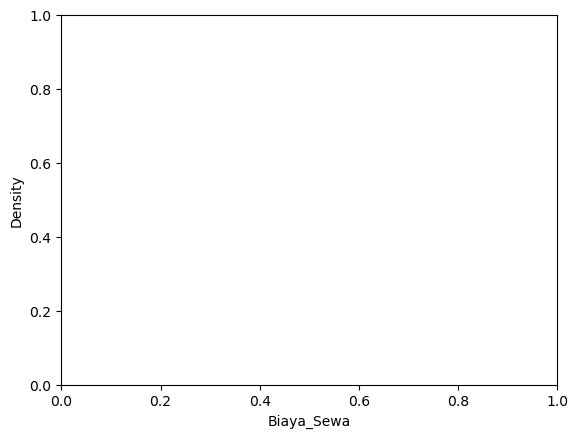

In [103]:
# Density plot
fig, ax = plt.subplots()

sns.kdeplot(data7[data7["AR_Type"]=="Change Tariff"]["Biaya_Sewa"], fill=True, color="blue", label="Change Tariff", ax=ax)
sns.kdeplot(data7[data7["AR_Type"]=="Downgrade"]["Biaya_Sewa"], fill=True, color="green", label="Downgrade", ax=ax)
sns.kdeplot(data7[data7["AR_Type"]=="New"]["Biaya_Sewa"], fill=True, color="red", label="New", ax=ax)
sns.kdeplot(data7[data7["AR_Type"]=="Relocation"]["Biaya_Sewa"], fill=True, color="yellow", label="Relocation", ax=ax)
sns.kdeplot(data7[data7["AR_Type"]=="Upgrade"]["Biaya_Sewa"], fill=True, color="pink", label="Upgrade", ax=ax)
sns.kdeplot(data7[data7["AR_Type"]=="Trial"]["Biaya_Sewa"], fill=True, color="purple", label="Trial", ax=ax)

ax.set_xlabel("Biaya_Sewa")
ax.set_ylabel("Density")

plt.show()

In [104]:
plt.show()

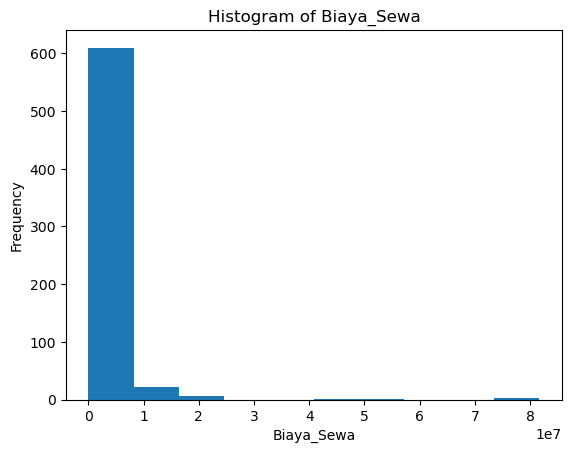

In [105]:
# Histogram of a Biaya_Sewa
plt.hist(data6['Biaya_Sewa'], bins=10)
plt.xlabel('Biaya_Sewa')
plt.ylabel('Frequency')
plt.title('Histogram of Biaya_Sewa')
plt.show()

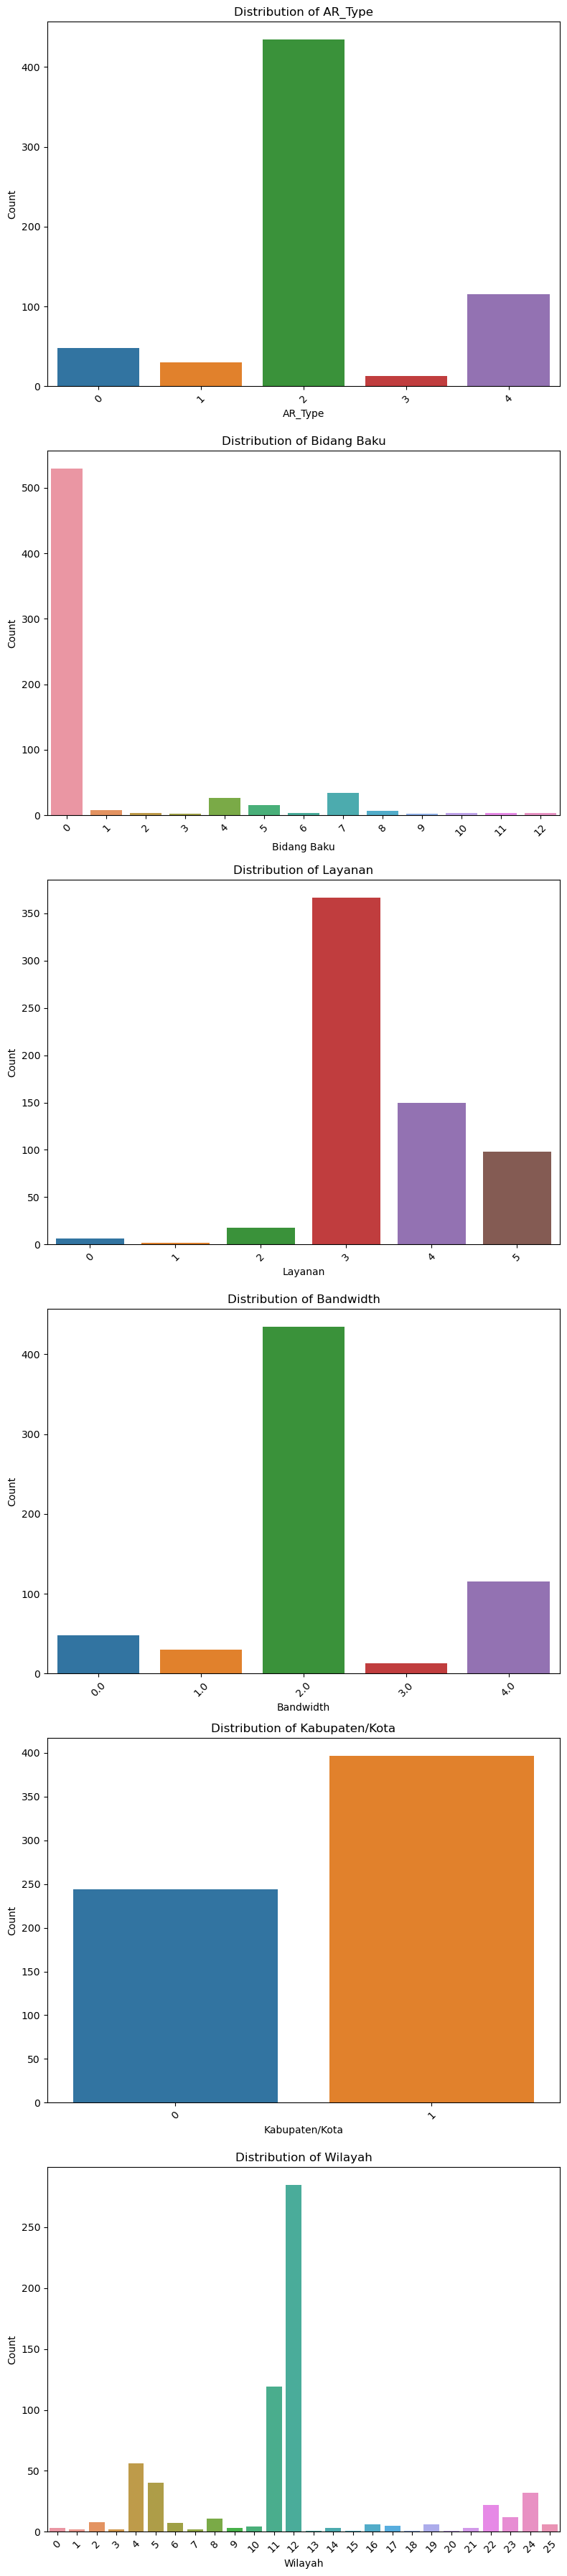

In [106]:
# Select the categorical variables
categorical_vars = ['AR_Type', 'Bidang Baku', 'Layanan', 'Bandwidth', 'Kabupaten/Kota', 'Wilayah']

# Create subplots for each categorical variable
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 6 * len(categorical_vars)))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data7, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Plot kind 'object' is not recognized

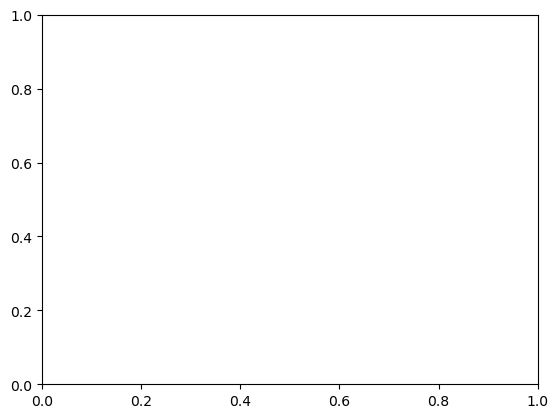

In [107]:
# Grouped bar chart
fig, ax = plt.subplots()

sns.catplot("Layanan", hue="AR_Type", data=data7, kind="object", ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.legend(title="Passenger Class")
#ax.set_xticklabels(["did not survive", "survived"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

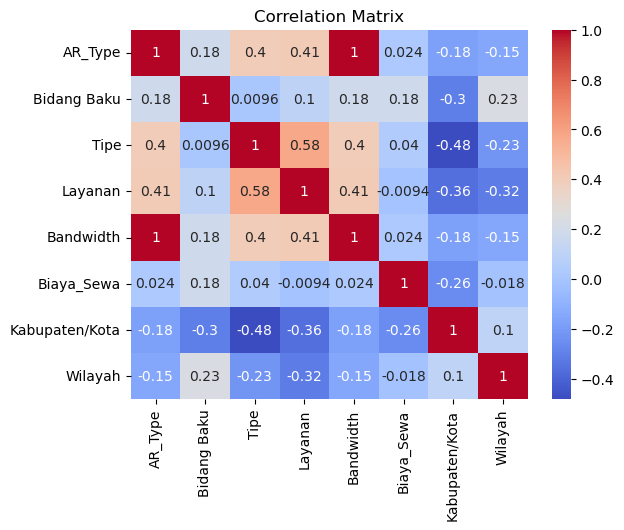

In [ ]:
# Correlation matrix
correlation_matrix = data7.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

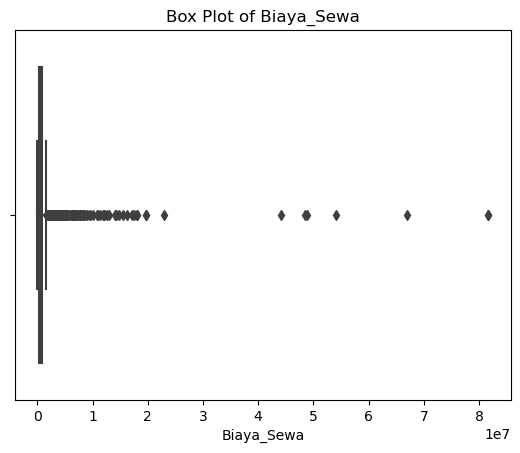

In [ ]:
# Box plot of a Biaya_Sewa with potential outliers
sns.boxplot(x='Biaya_Sewa', data=data)
plt.xlabel('Biaya_Sewa')
plt.title('Box Plot of Biaya_Sewa')
plt.show()

## **Check Outliers**

In [ ]:
# Fill NaN values with 0
data7 = data7.fillna(0)

# Check the updated dataset
print(data7.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 216 to 1815
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AR_Type         641 non-null    int32  
 1   Bidang Baku     641 non-null    int32  
 2   Tipe            641 non-null    int32  
 3   Layanan         641 non-null    int32  
 4   Bandwidth       641 non-null    float64
 5   Biaya_Sewa      641 non-null    float64
 6   Kabupaten/Kota  641 non-null    int32  
 7   Wilayah         641 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 30.0 KB
None


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Select the numerical variables for outlier detection
numerical_vars = ['AR_Type', 'Bidang Baku', 'Layanan', 'Bandwidth', 'Biaya_Sewa', 'Kabupaten/Kota', 'Wilayah']

# Detect outliers using z-score method
outliers = []
for var in numerical_vars:
    z_scores = stats.zscore(data7[var])
    threshold = 3  # Adjust this threshold as needed
    var_outliers = data7[np.abs(z_scores) > threshold]
    outliers.append(var_outliers)

# Concatenate the outliers for all variables
outliers = pd.concat(outliers)

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
      AR_Type  Bidang Baku  Tipe  Layanan  Bandwidth   Biaya_Sewa  \
280         4           10     0        3        4.0    575000.00   
1286        2           11     0        4        2.0   7000000.00   
1292        2           12     0        4        2.0   6000000.00   
1325        4           11     0        4        4.0   4500000.00   
1335        2           11     0        4        2.0   6500000.00   
1341        4            9     0        4        4.0  13000000.00   
1427        3           12     0        4        3.0   4800000.00   
1447        2           12     0        4        2.0         0.00   
1460        2            9     0        4        2.0   8000000.00   
1485        4           10     1        2        4.0   1650000.00   
1755        4           10     1        5        4.0  12000000.00   
1475        0            0     0        0        0.0  48830630.60   
1476        1            0     0        0        1.0   8500000.00   
1477        4           

## **Chi-Square Tests**

In [ ]:
data7.columns

Index(['AR_Type', 'Bidang Baku', 'Tipe', 'Layanan', 'Bandwidth', 'Biaya_Sewa',
       'Kabupaten/Kota', 'Wilayah'],
      dtype='object')

**AR_Type**

In [ ]:
cross_tab1 = pd.crosstab(data7['AR_Type'], data7['Layanan'])
cross_tab1

Layanan,0,1,2,3,4,5
AR_Type,,,,,,
0,2,0,5,31,5,5
1,2,1,0,1,11,15
2,1,1,4,326,98,5
3,0,0,2,2,4,5
4,1,0,7,7,32,68


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab1)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 389.2874390824918
p-value= 3.3974665001115605e-70
degrees of freedom = 20


**Bidang Baku**

In [ ]:
cross_tab2 = pd.crosstab(data7['Bidang Baku'], data7['Layanan'])
cross_tab2

Layanan,0,1,2,3,4,5
Bidang Baku,,,,,,
0,5,2,9,340,93,81
1,0,0,1,1,5,1
2,0,0,0,2,1,0
3,0,0,0,1,1,0
4,1,0,0,2,13,11
5,0,0,7,0,5,4
6,0,0,0,2,1,0
7,0,0,0,15,19,0
8,0,0,0,3,4,0


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab2)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 233.2368556282867
p-value= 2.921132370029113e-22
degrees of freedom = 60


**Tipe**

In [ ]:
cross_tab2 = pd.crosstab(data7['Tipe'], data7['Layanan'])
cross_tab2

Layanan,0,1,2,3,4,5
Tipe,,,,,,
0,6,2,0,367,150,0
1,0,0,18,0,0,98


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab2)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 641.0
p-value= 2.790971425743413e-136
degrees of freedom = 5


**Bandwidth**

In [ ]:
cross_tab3 = pd.crosstab(data7['Bandwidth'], data7['Layanan'])
cross_tab3

Layanan,0,1,2,3,4,5
Bandwidth,,,,,,
0.0,2,0,5,31,5,5
1.0,2,1,0,1,11,15
2.0,1,1,4,326,98,5
3.0,0,0,2,2,4,5
4.0,1,0,7,7,32,68


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab3)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 389.2874390824918
p-value= 3.3974665001115605e-70
degrees of freedom = 20


**Biaya_Sewa**

In [ ]:
cross_tab4 = pd.crosstab(data7['Biaya_Sewa'], data7['Layanan'])
cross_tab4

Layanan,0,1,2,3,4,5
Biaya_Sewa,,,,,,
0.00,0,0,1,20,2,0
200000.00,0,0,0,1,0,0
297297.30,0,0,0,276,0,0
400000.00,0,0,0,2,0,0
500000.00,0,0,0,1,0,0
...,...,...,...,...,...,...
19730630.63,0,0,0,0,0,1
23000000.00,0,0,0,0,1,0
48830630.60,1,0,0,0,0,0


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab4)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 2381.2942738693623
p-value= 2.9818716375806927e-235
degrees of freedom = 520


**Kabupaten/Kota**

In [ ]:
cross_tab5 = pd.crosstab(data7['Kabupaten/Kota'], data7['Layanan'])
cross_tab5

Layanan,0,1,2,3,4,5
Kabupaten/Kota,,,,,,
0,4,2,11,77,59,91
1,2,0,7,290,91,7


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab5)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 179.72329631456554
p-value= 6.131072355627377e-37
degrees of freedom = 5


**Wilayah**

In [ ]:
cross_tab6 = pd.crosstab(data7['Wilayah'], data7['Layanan'])
cross_tab6

Layanan,0,1,2,3,4,5
Wilayah,,,,,,
0,0,0,0,2,1,0
1,0,0,0,0,1,1
2,0,0,0,1,7,0
3,1,0,0,0,1,0
4,0,0,0,0,0,56
5,0,0,2,15,4,19
6,1,1,0,2,2,1
7,0,0,0,0,2,0
8,0,0,1,3,6,1


In [ ]:
chi_sq, p_val, dof, con_table = stats.chi2_contingency(cross_tab6)
print(f'chi-squared = {chi_sq}')
print(f'p-value= {p_val}')
print(f'degrees of freedom = {dof}')

chi-squared = 1233.5918504330361
p-value= 1.4700801628361204e-181
degrees of freedom = 125


## **Save the DataFrame**

#**Modeling**

## Split Data

In [127]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression #digunakan untuk membuat model multinomial logistic regression
from sklearn.naive_bayes import GaussianNB #digunakan untuk membuat model naive bayes
from sklearn.tree import DecisionTreeClassifier #digunakan untuk membuat model decision tree
from sklearn.ensemble import RandomForestClassifier #digunakan untuk membuat model random forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [110]:
# Load the data into a DataFrame
df = pd.DataFrame(data6)

# Split the data into training and testing sets
X = df.drop('Layanan', axis=1)
y = df['Layanan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Data Imbalance

In [111]:
pd.Series(y_train).value_counts(normalize=True)

3    0.568359
4    0.240234
5    0.154297
2    0.027344
0    0.007812
1    0.001953
Name: Layanan, dtype: float64

It is clear that train set is imbalanced. I will build first model with this data and later on try to balance it using SMOTE.

## Baseline Model - Multinomial Logistic Regression

In [112]:
cat_cols = X_train.select_dtypes(include='object').columns
indices = []
for col in cat_cols:
    indices.append(X_train.columns.get_loc(col))
indices

[]

In [113]:
transformer = ColumnTransformer(transformers=[('categorical',
                                               OneHotEncoder(handle_unknown = 'ignore'), indices)],
                                remainder = 'passthrough')

In [114]:
# Perform multinomial logistic regression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=20000)

# Create the pipeline including the transformer, scaler, and logistic regression model
base_model_pipe = make_pipeline(transformer, StandardScaler(with_mean=False), lr)

# Fit the pipeline on the training data
base_model_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = base_model_pipe.predict(X_test)
y_train_pred = base_model_pipe.predict(X_train)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Train Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y_test, y_test_pred)))
print("\nClassification Report:\n{}".format(classification_report(y_test, y_test_pred)))

Train Set Accuracy: 82.03%
Test Set Accuracy: 83.72%

Confusion Matrix:
[[ 0  0  0  0  2  0]
 [ 0  0  0  0  1  0]
 [ 0  0  1  0  0  3]
 [ 0  0  0 74  2  0]
 [ 0  0  0 13 14  0]
 [ 0  0  0  0  0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       1.00      0.25      0.40         4
           3       0.85      0.97      0.91        76
           4       0.74      0.52      0.61        27
           5       0.86      1.00      0.93        19

    accuracy                           0.84       129
   macro avg       0.58      0.46      0.47       129
weighted avg       0.81      0.84      0.81       129



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
residuals = y_train == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     420
False     92
Name: Layanan, dtype: int64


In [116]:
residuals = y_test == y_test_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     108
False     21
Name: Layanan, dtype: int64


## Multinomial Logistic Regression with Upsampled Data

In [117]:
print(X.columns)

Index(['AR_Type', 'Bidang Baku', 'Tipe', 'Bandwidth', 'Biaya_Sewa',
       'Kabupaten/Kota', 'Wilayah'],
      dtype='object')


In [129]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the minimum number of samples (n_samples) among the 199 classes
n_samples = min([len(X_train[y_train == i]) for i in range(199)])

# Choose a value for the n_neighbors parameter
n_neighbors = 5  # Adjust this value as needed

# Apply SMOTE if n_neighbors <= n_samples, otherwise apply RandomOverSampler
if n_neighbors <= n_samples:
    oversampler = SMOTE(sampling_strategy='not majority', k_neighbors=n_neighbors)
else:
    oversampler = RandomOverSampler(sampling_strategy='not majority')

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Create the logistic regression model
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=20000)

# Fit the logistic regression model on the preprocessed training data
lr.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train_oversampled)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train_oversampled, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Train Set Accuracy: {:.2f}%".format(train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(test_accuracy))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y_test, y_test_pred)))
print("\nClassification Report:\n{}".format(classification_report(y_test, y_test_pred)))

# Save the trained model as a .pkl file
joblib.dump(lr, 'lr_model.pkl')

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Train Set Accuracy: 74.85%
Test Set Accuracy: 82.17%

Confusion Matrix:
[[ 0  0  0  0  0]
 [ 0  3  0  0  1]
 [ 0  0 76  6  0]
 [ 1  0 12 10  0]
 [ 0  3  0  0 17]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.50      0.75      0.60         4
           3       0.86      0.93      0.89        82
           4       0.62      0.43      0.51        23
           5       0.94      0.85      0.89        20

    accuracy                           0.82       129
   macro avg       0.59      0.59      0.58       129
weighted avg       0.82      0.82      0.82       129



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this beha

['lr_model.pkl']

In [121]:
residuals = y_train_oversampled == y_train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     1268
False     442
Name: Layanan, dtype: int64


In [122]:
residuals = y_test == y_test_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     105
False     24
Name: Layanan, dtype: int64


In [ ]:
# Save Model
# Import the joblib package
import joblib
# Give the name to the saved model
filename = 'lr_model.pkl'
# Save the model (lr - pipeline of the final model)
joblib.dump(lr, filename)

# save the model to disk
import pickle
filename = 'lr2_model.sav'
pickle.dump(lr, open(filename, 'wb'))

## Naive Bayes


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_test_pred2 = gnb.predict(X_test)
y_train_pred2=gnb.predict(X_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

In [ ]:
# Save Model
# Import the joblib package
import joblib
# Give the name to the saved model
filename = 'gnb_model.pkl'
# Save the model (lr - pipeline of the final model)
joblib.dump(gnb, filename)

## Decision Tree


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

In [ ]:
# Save Model
# Import the joblib package
import joblib
# Give the name to the saved model
filename = 'dtc_model.pkl'
# Save the model (lr - pipeline of the final model)
joblib.dump(dtc, filename)

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

y_test_pred4 = rf.predict(X_test)
y_train_pred4=rf.predict(X_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))

#Confusion matrix and classification report
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))

In [ ]:
# Save Model
# Import the joblib package
import joblib
# Give the name to the saved model
filename = 'rf_model.pkl'
# Save the model (lr - pipeline of the final model)
joblib.dump(rf, filename)

## Support Vector Machine

In [ ]:
# from sklearn.svm import SVC

# svm = SVC(kernel='linear', random_state=42)
# svm.fit(X_train, y_train)

# y_test_pred5 = svm.predict(X_test)
# y_train_pred5=svm.predict(X_train)


# print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train)*100))
# print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))

# #Confusion matrix and classification report
# print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
# print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

## Evaluation

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score


# y_pred_proba = lr.predict_proba(np.array(X_test))[:,1]

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# sns.set()

# plt.plot(fpr, tpr)

# plt.plot(fpr, fpr, linestyle = '--', color = 'k')

# plt.xlabel('False positive rate')

# plt.ylabel('True positive rate')

# AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

# plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

# plt.show()

In [ ]:
# # Importing all necessary libraries
# from sklearn.metrics import roc_curve, auc

# class_probabilities = lr.predict_proba(X_test)
# preds = class_probabilities[:, 1]

# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)

# # Printing AUC
# print(f"AUC for our classifier is: {roc_auc}")

# # Plotting the ROC
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
# # Perform cross-validation
# cv_scores = cross_val_score(lr, X, y, cv=5)

# # Print the cross-validation scores
# print('Cross-Validation Scores:', cv_scores)
# print('Average Accuracy:', cv_scores.mean())